In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from pylab import rcParams
#from statsmodels.tsa.stattools import adfuller


In [2]:
rh_prediction = pd.read_csv(r'C:\Users\94718\OneDrive\Desktop\4 yr\sliit\4 yr 1 sem\IOT & Big Data\Assessment\assesment question\dataset\colombo_rh_2012-2018.csv')
rh_prediction.head(15)

,station_id,station_name,element_name,year,month,day,obs_val
0,43466,COLOMBO,RHMAX,2012,1,1,91.0
1,43466,COLOMBO,RHMAX,2012,1,2,90.0
2,43466,COLOMBO,RHMAX,2012,1,3,89.0
3,43466,COLOMBO,RHMAX,2012,1,4,89.0
4,43466,COLOMBO,RHMAX,2012,1,5,95.0
5,43466,COLOMBO,RHMAX,2012,1,6,93.0
6,43466,COLOMBO,RHMAX,2012,1,7,96.0
7,43466,COLOMBO,RHMAX,2012,1,8,96.0
8,43466,COLOMBO,RHMAX,2012,1,9,98.0
9,43466,COLOMBO,RHMAX,2012,1,10,93.0


In [3]:
rh_prediction.isna().sum()

station_id       0
station_name     0
element_name     0
year             0
month            0
day              0
obs_val         20
dtype: int64

In [4]:
#taking the rows which have null values in obs_val column
rh_prediction_missing = pd.isnull(rh_prediction["obs_val"])
 
#printing them
rh_prediction[rh_prediction_missing]

,station_id,station_name,element_name,year,month,day,obs_val
60,43466,COLOMBO,RHMAX,2012,2,30,NaN
61,43466,COLOMBO,RHMAX,2012,2,31,NaN
123,43466,COLOMBO,RHMAX,2012,4,31,NaN
185,43466,COLOMBO,RHMAX,2012,6,31,NaN
278,43466,COLOMBO,RHMAX,2012,9,31,NaN
340,43466,COLOMBO,RHMAX,2012,11,31,NaN
431,43466,COLOMBO,RHMAX,2013,2,29,NaN
432,43466,COLOMBO,RHMAX,2013,2,30,NaN
433,43466,COLOMBO,RHMAX,2013,2,31,NaN
495,43466,COLOMBO,RHMAX,2013,4,31,NaN


In [5]:
#drop all missing values in the dataset
rh_prediction.dropna(inplace=True)
rh_prediction.isna().sum()

station_id      0
station_name    0
element_name    0
year            0
month           0
day             0
obs_val         0
dtype: int64

In [6]:
rh_prediction.head(15)

,station_id,station_name,element_name,year,month,day,obs_val
0,43466,COLOMBO,RHMAX,2012,1,1,91.0
1,43466,COLOMBO,RHMAX,2012,1,2,90.0
2,43466,COLOMBO,RHMAX,2012,1,3,89.0
3,43466,COLOMBO,RHMAX,2012,1,4,89.0
4,43466,COLOMBO,RHMAX,2012,1,5,95.0
5,43466,COLOMBO,RHMAX,2012,1,6,93.0
6,43466,COLOMBO,RHMAX,2012,1,7,96.0
7,43466,COLOMBO,RHMAX,2012,1,8,96.0
8,43466,COLOMBO,RHMAX,2012,1,9,98.0
9,43466,COLOMBO,RHMAX,2012,1,10,93.0


In [94]:
cols=["year","month","day"]
rh_prediction['date'] = rh_prediction[cols].apply(lambda x: '-'.join(x.values.astype(str)), axis="columns")
rh_prediction.head(15)


,station_id,station_name,element_name,year,month,day,obs_val,date
0,43466,COLOMBO,RHMAX,2012,1,1,91.0,2012-1-1
1,43466,COLOMBO,RHMAX,2012,1,2,90.0,2012-1-2
2,43466,COLOMBO,RHMAX,2012,1,3,89.0,2012-1-3
3,43466,COLOMBO,RHMAX,2012,1,4,89.0,2012-1-4
4,43466,COLOMBO,RHMAX,2012,1,5,95.0,2012-1-5
5,43466,COLOMBO,RHMAX,2012,1,6,93.0,2012-1-6
6,43466,COLOMBO,RHMAX,2012,1,7,96.0,2012-1-7
7,43466,COLOMBO,RHMAX,2012,1,8,96.0,2012-1-8
8,43466,COLOMBO,RHMAX,2012,1,9,98.0,2012-1-9
9,43466,COLOMBO,RHMAX,2012,1,10,93.0,2012-1-10


In [95]:
result = rh_prediction.dtypes

print("Output:")
print(result)

Output:
station_id        int64
station_name     object
element_name     object
year              int64
month             int64
day               int64
obs_val         float64
date             object
dtype: object


In [96]:
# convert the 'Date' column to datetime format
rh_prediction['date']= pd.to_datetime(rh_prediction['date'])

# Check the format of 'Date' column
rh_prediction.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 4383 entries, 0 to 4402
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   station_id    4383 non-null   int64         
 1   station_name  4383 non-null   object        
 2   element_name  4383 non-null   object        
 3   year          4383 non-null   int64         
 4   month         4383 non-null   int64         
 5   day           4383 non-null   int64         
 6   obs_val       4383 non-null   float64       
 7   date          4383 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(1), int64(4), object(2)
memory usage: 308.2+ KB


In [97]:
#Create a pivot table using element RHMAX and RHMIN since it has two values
rh_prediction_pivot = pd.pivot_table(rh_prediction, index=['date','station_id','station_name'], columns='element_name', values='obs_val')
rh_prediction_pivot.head(10)


,,element_name,RHMAX,RHMIN
date,station_id,station_name,,
2012-01-01,43466,COLOMBO,91.0,NaN
2012-01-02,43466,COLOMBO,90.0,NaN
2012-01-03,43466,COLOMBO,89.0,NaN
2012-01-04,43466,COLOMBO,89.0,NaN
2012-01-05,43466,COLOMBO,95.0,NaN
2012-01-06,43466,COLOMBO,93.0,NaN
2012-01-07,43466,COLOMBO,96.0,NaN
2012-01-08,43466,COLOMBO,96.0,NaN
2012-01-09,43466,COLOMBO,98.0,NaN


In [125]:
#download the pivot table to a csv
rh_prediction_pivot.to_csv(r'C:\Users\94718\OneDrive\Desktop\New folder (3)\my_datanull.csv', index=True)

In [100]:
#check for missing data
rh_prediction_pivot.isna().sum()

element_name
RHMAX       0
RHMIN    1096
dtype: int64

In [110]:
#handling the null values using adding the mean values to null values in the columns
#get mean
meanVal = rh_prediction_pivot['RHMIN'].mean()
#print(type(meanVal))
#add to null values
rh_prediction_pivot['RHMIN'].fillna(value=meanVal, inplace=True)
#handle the datatype
rh_prediction_pivot['RHMIN'] = rh_prediction_pivot['RHMIN'].apply(np.int64)


#download the pivot table to a csv
rh_prediction_pivot.to_csv(r'C:\Users\94718\OneDrive\Desktop\New folder (3)\my_data1.csv', index=True)

#check for missing data again
rh_prediction_pivot.isna().sum()

element_name
RHMAX    0
RHMIN    0
dtype: int64

In [117]:
#get the avaergae valu of the rhmax and rhmin columns
avg = rh_prediction_pivot[['RHMAX', 'RHMIN']].mean(axis=1)
#add it to a new column in the datadrmae
rh_prediction_pivot['RHAVG'] = avg

rh_prediction_pivot.head(10)

#download the pivot table to a csv
rh_prediction_pivot.to_csv(r'C:\Users\94718\OneDrive\Desktop\New folder (3)\my_dataavg.csv', index=True)


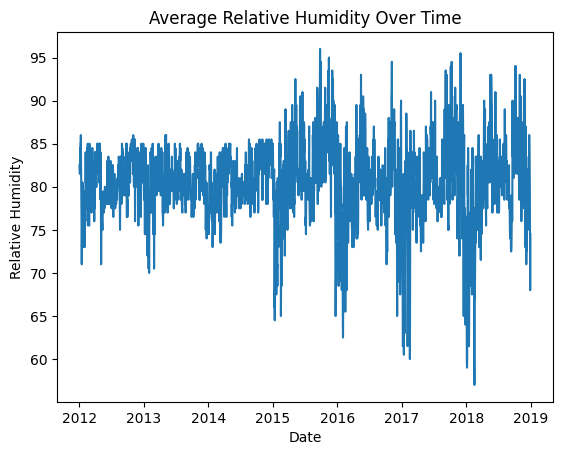

In [123]:
# remove pivot table
pivot_table = rh_prediction_pivot.reset_index()

# Create a line plot of the rhaverage column over time
plt.plot(pivot_table['date'], pivot_table['RHAVG'])

# Add axis labels and a title
plt.xlabel('Date')
plt.ylabel('Relative Humidity')
plt.title('Average Relative Humidity Over Time')

# Display the plot
plt.show()

In [152]:
pivot_table.head(10)

element_name,date,station_id,station_name,RHMAX,RHMIN,avg,RHAVG
0,2012-01-01,43466,COLOMBO,91.0,74,82.5,82.5
1,2012-01-02,43466,COLOMBO,90.0,74,82.0,82.0
2,2012-01-03,43466,COLOMBO,89.0,74,81.5,81.5
3,2012-01-04,43466,COLOMBO,89.0,74,81.5,81.5
4,2012-01-05,43466,COLOMBO,95.0,74,84.5,84.5
5,2012-01-06,43466,COLOMBO,93.0,74,83.5,83.5
6,2012-01-07,43466,COLOMBO,96.0,74,85.0,85.0
7,2012-01-08,43466,COLOMBO,96.0,74,85.0,85.0
8,2012-01-09,43466,COLOMBO,98.0,74,86.0,86.0
9,2012-01-10,43466,COLOMBO,93.0,74,83.5,83.5


In [127]:
#check the stationarity
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller

In [163]:
pivot_table.head(10)

element_name,date,station_id,station_name,RHMAX,RHMIN,avg,RHAVG
0,2012-01-01,43466,COLOMBO,91.0,74,82.5,82.5
1,2012-01-02,43466,COLOMBO,90.0,74,82.0,82.0
2,2012-01-03,43466,COLOMBO,89.0,74,81.5,81.5
3,2012-01-04,43466,COLOMBO,89.0,74,81.5,81.5
4,2012-01-05,43466,COLOMBO,95.0,74,84.5,84.5
5,2012-01-06,43466,COLOMBO,93.0,74,83.5,83.5
6,2012-01-07,43466,COLOMBO,96.0,74,85.0,85.0
7,2012-01-08,43466,COLOMBO,96.0,74,85.0,85.0
8,2012-01-09,43466,COLOMBO,98.0,74,86.0,86.0
9,2012-01-10,43466,COLOMBO,93.0,74,83.5,83.5


In [169]:
df1 = pivot_table.drop(['station_id','station_name','RHMAX','RHMIN','avg'], axis=1)
df1.head(10)

element_name,date,RHAVG
0,2012-01-01,82.5
1,2012-01-02,82.0
2,2012-01-03,81.5
3,2012-01-04,81.5
4,2012-01-05,84.5
5,2012-01-06,83.5
6,2012-01-07,85.0
7,2012-01-08,85.0
8,2012-01-09,86.0
9,2012-01-10,83.5


In [170]:
# Reset the index to make the "date" column a regular column
#pivot_table = rh_prediction_pivot.reset_index()

result = adfuller(df1['RHAVG'])

# Print the results of the ADF test
print('ADF Statistic: %f' % result[0])
print('p-value: %.15f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: -7.085362
p-value: 0.000000000455331
Critical Values:
	1%: -3.433
	5%: -2.863
	10%: -2.567


In [173]:
#print(pivot_table)

# convert the 'Date' column to datetime format
df1['date']= pd.to_datetime(df1['date'])

# Check the format of 'Date' column
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2557 entries, 0 to 2556
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    2557 non-null   datetime64[ns]
 1   RHAVG   2557 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 40.1 KB


In [132]:
from pmdarima import auto_arima
import warnings
warnings.filterwarnings("ignore")

In [174]:
stepwise_fit = auto_arima(df1['RHAVG'],trace=True, suppress_warnings=True)
stepwise_fit.summary()

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=13247.644, Time=2.61 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=15065.886, Time=0.05 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=13280.489, Time=0.17 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=13927.121, Time=0.31 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=29706.518, Time=0.04 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=13255.646, Time=2.01 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=13275.228, Time=0.53 sec
 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=13256.025, Time=3.31 sec
 ARIMA(2,0,3)(0,0,0)[0] intercept   : AIC=13242.911, Time=1.82 sec
 ARIMA(1,0,3)(0,0,0)[0] intercept   : AIC=13227.395, Time=2.73 sec
 ARIMA(0,0,3)(0,0,0)[0] intercept   : AIC=13435.518, Time=0.86 sec
 ARIMA(1,0,4)(0,0,0)[0] intercept   : AIC=13225.951, Time=3.88 sec
 ARIMA(0,0,4)(0,0,0)[0] intercept   : AIC=13372.209, Time=1.15 sec
 ARIMA(2,0,4)(0,0,0)[0] intercept   : AIC=13231.523, Time=4.12 sec
 ARIMA(1,0,5)(0,0,0

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 2557
Model:               SARIMAX(1, 0, 4)   Log Likelihood               -6605.975
Date:                Thu, 04 May 2023   AIC                          13225.951
Time:                        22:05:44   BIC                          13266.877
Sample:                             0   HQIC                         13240.792
                               - 2557                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      6.2943      1.120      5.621      0.000       4.100       8.489
ar.L1          0.9216      0.014     65.995      0.000       0.894       0.949
ma.L1         -0.2789      0.021    -13.382      0.000      -0.320      -0.238
ma.L2         -0.1671      0.019     -8.729      0.000      -0.205      -0.130
ma.L3         -0.1216      0.018     -6.739      0.000      -0.157      -0.086
ma.L4         -0.0363      0.019     -1.956      0.050      -0.073    6.89e-05
sigma2        10.2570      0.189     54.231      0.000       9.886      10.628
===================================================================================
Ljung-Box (L1) (Q):                   0.05   Jarque-Bera (JB):               983.13
Prob(Q):                              0.82   Prob(JB):                         0.00
Heteroskedasticity (H):               3.01   Skew:                            -0.27
Prob(H) (two-sided):                  0.00   Kurtosis:                         5.99
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [195]:
print(df1.shape)
train ,test = df1[:2045], df1[2045:]

print(train.shape,test.shape)


(2557, 2)
(2045, 2) (512, 2)


In [191]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 2192 to 2556
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    365 non-null    datetime64[ns]
 1   RHAVG   365 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 5.8 KB


In [196]:
from statsmodels.tsa.arima.model import ARIMA
model=ARIMA(train['RHAVG'],order=(1,0,4))
#model=ARIMA(train,order=(1,0,4),trend='c')
model=model.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  RHAVG   No. Observations:                 2045
Model:                 ARIMA(1, 0, 4)   Log Likelihood               -5149.443
Date:                Fri, 05 May 2023   AIC                          10312.885
Time:                        00:14:57   BIC                          10352.247
Sample:                             0   HQIC                         10327.322
                               - 2045                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         80.3546      0.384    209.137      0.000      79.602      81.108
ar.L1          0.9386      0.012     76.651      0.000       0.915       0.963
ma.L1         -0.3279      0.020    -16.466      0.000      -0.367      -0.289
ma.L2         -0.1728      0.019     -8.880      0.000      -0.211      -0.135
ma.L3         -0.1105      0.019     -5.792      0.000      -0.148      -0.073
ma.L4         -0.0422      0.019     -2.262      0.024      -0.079      -0.006
sigma2         9.0058      0.178     50.538      0.000       8.657       9.355
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):               955.30
Prob(Q):                              0.93   Prob(JB):                         0.00
Heteroskedasticity (H):               2.98   Skew:                            -0.27
Prob(H) (two-sided):                  0.00   Kurtosis:                         6.30
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [229]:
#TEST ONLY
from statsmodels.tsa.statespace.sarimax import SARIMAX
print(df1.shape)
train1 ,test1 = df1[:2045], df1[2045:]


# Fit SARIMA model to train data
modelT = SARIMAX(train1['RHAVG'], order=(1,0,4), seasonal_order=(0,0,0,0))
resultsT = modelT.fit()

# Predict values for test data using fitted model
predT = resultsT.predict(start=test1.index[0], end=test1.index[-1])

# Print predicted values with corresponding dates
print(pd.DataFrame({'date': test1.index, 'predicted_rhavg': predT}))



(2557, 2)
      date  predicted_rhavg
2045  2045        79.852255
2046  2046        79.520432
2047  2047        79.322755
2048  2048        79.218290
2049  2049        79.214139
...    ...              ...
2552  2552        77.153739
2553  2553        77.149697
2554  2554        77.145654
2555  2555        77.141612
2556  2556        77.137571

[512 rows x 2 columns]


In [210]:
start = len(train)
end=len(train)+len(test)-1
print(start)
print(end)
pred=model.predict(start=start,end=end,type="levels")
date = test['date']
results = pd.DataFrame({'date': date, 'predicted_rhavg': pred})
print(results)

2045
2556
           date  predicted_rhavg
2045 2017-08-07        80.091697
2046 2017-08-08        79.914554
2047 2017-08-09        79.827724
2048 2017-08-10        79.816828
2049 2017-08-11        79.849874
...         ...              ...
2552 2018-12-27        80.354614
2553 2018-12-28        80.354614
2554 2018-12-29        80.354614
2555 2018-12-30        80.354614
2556 2018-12-31        80.354614

[512 rows x 2 columns]


In [241]:
#ONLY TEST
start1 = len(train1)
end1=len(train1)+len(test1)-1
print(start1)
print(end1)
predT=model.predict(start=start1,end=end1,type="levels")
date = test1['date']
resultsT = pd.DataFrame({'date': date, 'predicted_rhavg': predT})
print(resultsT)

2045
2556
           date  predicted_rhavg
2045 2017-08-07        80.102564
2046 2017-08-08        80.480629
2047 2017-08-09        79.211272
2048 2017-08-10        79.884943
2049 2017-08-11        80.313652
...         ...              ...
2552 2018-12-27        82.527278
2553 2018-12-28        82.021565
2554 2018-12-29        80.714451
2555 2018-12-30        75.313756
2556 2018-12-31        72.722048

[512 rows x 2 columns]


In [213]:
#download the pivot table to a csv
results.to_csv(r'C:\Users\94718\OneDrive\Desktop\New folder (3)\test.csv', index=True)

In [242]:
#ONLY FOR TEST
resultsT.to_csv(r'C:\Users\94718\OneDrive\Desktop\New folder (3)\TTTTTTTTTTTTT.csv', index=True)

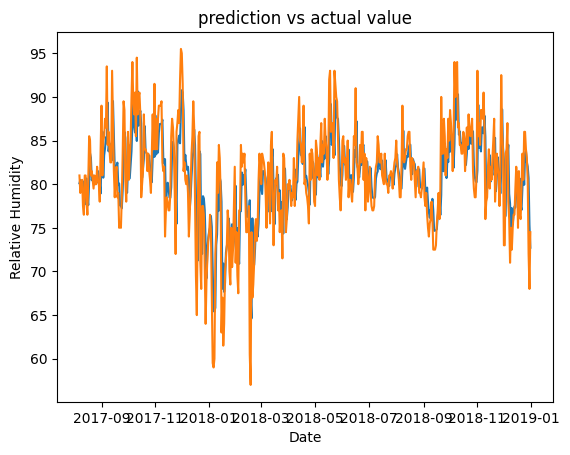

In [243]:
#only for test
# Create a line plot of the rhaverage column over time
plt.plot(resultsT['date'], resultsT['predicted_rhavg'],label='predicted')
plt.plot(test['date'], test['RHAVG'],label='actual')

# Add axis labels and a title
plt.xlabel('Date')
plt.ylabel('Relative Humidity')
plt.title('prediction vs actual value')

# Display the plot
plt.show()


In [214]:
test['RHAVG'].mean()

80.970703125

In [215]:
from sklearn.metrics import mean_squared_error
from math import sqrt
rmse=sqrt(mean_squared_error(pred,test['RHAVG']))
print(rmse)

5.911145051416537


In [245]:
#ONLY FOR TEST
test1['RHAVG'].mean()
rmse=sqrt(mean_squared_error(predT,test1['RHAVG']))
print(rmse)


3.89455978527945


In [217]:
model2=ARIMA(df1['RHAVG'],order=(1,0,4))
#model=ARIMA(train,order=(1,0,4),trend='c')
model2=model2.fit()

In [225]:
index_future_dates=pd.date_range(start='2018-12-30',end='2024-05-13')
pred=model2.predict(start=len(df1),end=len(df1)+1961,typ='levels').rename('ARIMA PREDICTIONS')
pred.index=index_future_dates
print(pred)

2018-12-30    76.935071
2018-12-31    78.239495
2019-01-01    78.491704
2019-01-02    78.492972
2019-01-03    78.588887
                ...    
2024-05-09    80.461457
2024-05-10    80.461457
2024-05-11    80.461457
2024-05-12    80.461457
2024-05-13    80.461457
Freq: D, Name: ARIMA PREDICTIONS, Length: 1962, dtype: float64


In [226]:
#download the pivot table to a csv
pred.to_csv(r'C:\Users\94718\OneDrive\Desktop\New folder (3)\predictedRHvalues.csv', index=True)